# CMPT 423/820
## Assignment 4 Question 1
* Seyedeh Mina Mousavifar
* 11279515
* sem311

In [123]:
import pandas as pd

iris = pd.read_csv('data/A4Q1/iris.csv', 
                   header=None, 
                   names=['SepalLengthCm', 'SepalWidthCm', 
                          'PetalLengthCm', 'PetalWidthCm', 'Species'])

iris_1 = pd.read_csv('data/A4Q1/iris01.csv').drop(['Unnamed: 0'], axis = 1)
iris_5 = pd.read_csv('data/A4Q1/iris05.csv').drop(['Unnamed: 0'], axis = 1)
iris_10 = pd.read_csv('data/A4Q1/iris10.csv').drop(['Unnamed: 0'], axis = 1)
iris_20 = pd.read_csv('data/A4Q1/iris20.csv').drop(['Unnamed: 0'], axis = 1)

data_list = [iris, iris_1, iris_5, iris_10, iris_20]
class_list = [0,1,5,10,20]

### Classifier

I choose *Naive Bayes* classifier for this purpose because we have thoroughly investigated the application of NB on the Iris dataset. The following function implements a *Gaussian Naive Bayes* classifier and calculated 10-fold cross-validation on the given dataset.

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

KFOLDS = 10

def nb_classifier(data_in, label_in):
    """
    :purpose: This function creates an NB classifier and calculates 
    its cross validated accuracy
    :param data_in: dataset
    :param label_in: true answers for the dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    clf_nb = GaussianNB()
    
    # fitting the model to the data
    clf_nb.fit(data_in, label_in) 
    
    result = cross_val_score(clf_nb, data_in, 
                    label_in, 
                    cv=KFOLDS, 
                    scoring='accuracy')
    
    return round(result.mean(),5)

In [125]:
# creating dataframe for saving results

result = pd.DataFrame(columns=['method', 'miss percentage', 'accuracy'])

def result_finder(data_list_in, result_in, function, string):
    """
    :purpose: This function operates function on
    the data list and return the result dataframe
    :param data_list_in: list of datasets
    :param result_in: result dataframe
    :param function: given function for modelling
    :param string: filling method
    :return: the result dataframe
    """
    # finding accuracy for each dataset
    miss_acc = [string]
    for i in range(len(data_list_in)):
        miss_acc = [string, class_list[i],function(data_list_in[i])]
        result_in = result_in.append(pd.Series(miss_acc, 
                                      index = result_in.columns), 
                            ignore_index=True)
        
    # add to result dataframe
    return result_in

#### 1. Remove any sample (row) with missing data.

In [126]:
def omit_row_classifier(data_in):
    """
    :purpose: This function omit rows with NA value and
    return the learned guassian classifier accuracy
    :param data_in: dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    removed_data = data_in.dropna()
    
    labels = removed_data.values[:, 4]
    data = removed_data.values[:, :4]
    
    return nb_classifier(data, labels)

In [127]:
result = result_finder(data_list, result, omit_row_classifier, 'remove')

#### 2. Fill in any missing data with a random value. Use the range (min, max) of the feature as the range for your random value.

In [128]:
from random import uniform

def random_row_classifier(data_in):
    """
    :purpose: This function fill rows with NA value
    with random value
    return the learned guassian classifier accuracy
    :param data_in: dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    labels = data_in.values[:, 4]
    
    removed_data = data_in.drop(['Species'], axis = 1)
    removed_data = removed_data.transform(
        lambda v: v.fillna(round(uniform(np.min(v), np.max(v)), 2)))
    
    data = removed_data.values
    
    return nb_classifier(data, labels)

In [129]:
result = result_finder(data_list, result, random_row_classifier, 'random')

#### 3. Fill in the missing data with the mean value for the feature, regardless of class label.

In [130]:
def mean_feature_row_classifier(data_in):
    """
    :purpose: This function fill rows with NA value
    with mean feature value
    return the learned guassian classifier accuracy
    :param data_in: dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    removed_data = data_in.fillna(data_in.mean())
    
    labels = removed_data.values[:, 4]
    data = removed_data.values[:, :4]
    
    return nb_classifier(data, labels)

In [131]:
result = result_finder(data_list, result, mean_feature_row_classifier, 'mean feature')

#### 4. Fill in the missing data with the mean value for the feature, given the class. For example, if the miss- ing value appears on a row with class label L, then use the mean value of that feature, limiting the calculation to rows having label L.

In [132]:
import numpy as np

def mean_group_feature_row_classifier(data_in):
    """
    :purpose: This function fill rows with NA value
    with mean feature value
    return the learned guassian classifier accuracy
    :param data_in: dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    labels = data_in.values[:, 4]
    
    removed_data = data_in.groupby('Species').transform(
        lambda grp: grp.fillna(np.mean(grp)))
    
    data = removed_data.values
    
    return nb_classifier(data, labels)

In [133]:
result = result_finder(data_list, result, mean_group_feature_row_classifier, 'label mean feature')
result

,method,miss percentage,accuracy
0,remove,0,0.95333
1,remove,1,0.95190
2,remove,5,0.96731
3,remove,10,0.95000
4,remove,20,0.95238
5,random,0,0.95333
6,random,1,0.94667
7,random,5,0.93333
8,random,10,0.92000
9,random,20,0.84000


#### Plotting

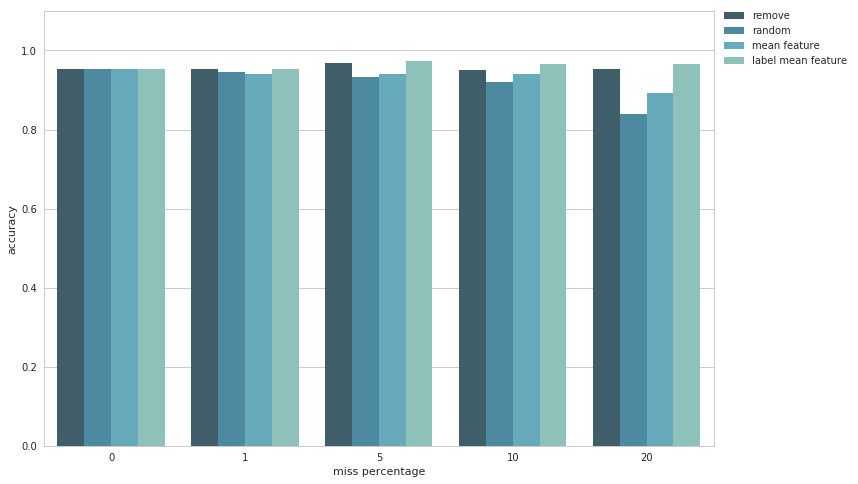

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

ax = sns.barplot(data = result,
            x = 'miss percentage',
            y = 'accuracy',
            hue = 'method',
            palette="GnBu_d")

ax.set(ylim=(0, 1.1))

ax.legend(bbox_to_anchor= (1.01, 1.01), ncol=1, 
            borderaxespad=0)

As we can see, the accuracy of the model decreases as we delete more data. Furthermore, filling with label-based feature average is more precise than feature-based average, and filling with random value has the lease accuracy. Because filling with average doesn't add any outlier, especially concerning the label that doesn't change the group feature mean and doesn't have an adverse effect on the existing data in the dataset. In contrast, filling with random values might shift the mean of feature, which would impact the original dataset characteristics.